In [ ]:
# Scatter plot
import pandas as pd
df = pd.read_csv('cleaned_playstore_data.csv')
display(df.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [ ]:
paid_apps_df = df[df['Type'] == 'Paid']

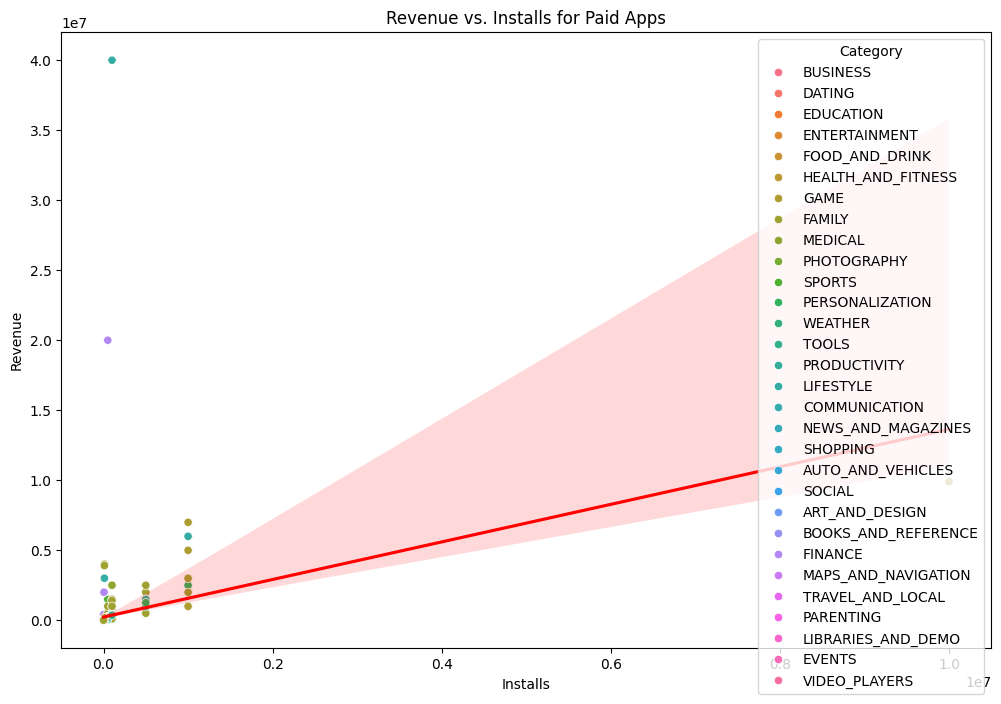

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=paid_apps_df)
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.title('Revenue vs. Installs for Paid Apps')

# using regression for trendline
sns.regplot(x='Installs', y='Revenue', data=paid_apps_df, scatter=False, color='red')

plt.show()

In [ ]:
# Choropleth map
import pandas as pd

df = pd.read_csv('cleaned_playstore_data.csv')

In [ ]:

df_filtered = df[~df.Category.str.startswith(('A', 'C', 'G', 'S'))]

installs_by_category = df_filtered.groupby('Category')['Installs'].sum()

top_5_categories = installs_by_category.nlargest(5).index.tolist()

df_filtered['Installs_Over_Million'] = df_filtered.apply(lambda row: row['Category'] in top_5_categories and installs_by_category[row['Category']] > 1000000, axis=1)
# df_filtered[df_filtered['Category'] == row['Category']]['Installs'].sum() > 1000000, axis=1)

<ipython-input-2-8300da31d9da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Installs_Over_Million'] = df_filtered.apply(lambda row: row['Category'] in top_5_categories and


In [ ]:

df_filtered = df[~df.Category.str.startswith(('A', 'C', 'G', 'S'))]
installs_by_category = df_filtered.groupby('Category')['Installs'].sum()
top_5_categories = installs_by_category.nlargest(5).index.tolist()
df_filtered['Installs_Over_Million'] = False
for category in top_5_categories:
    if df_filtered[df_filtered['Category'] == category]['Installs'].sum() > 1000000:
        df_filtered.loc[df_filtered['Category'] == category, 'Installs_Over_Million'] = True

<ipython-input-3-08c9450fb3be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Installs_Over_Million'] = False  # Initialize the column with False


In [ ]:

df_filtered = df[~df.Category.str.startswith(('A', 'C', 'G', 'S'))]

installs_by_category = df_filtered.groupby('Category')['Installs'].sum()

top_5_categories = installs_by_category.nlargest(5).index.tolist().copy()
df_filtered = df_filtered
df_filtered['Installs_Over_Million'] = False
for category in top_5_categories:
    if df_filtered[df_filtered['Category'] == category]['Installs'].sum() > 1000000:
        df_filtered.loc[df_filtered['Category'] == category, 'Installs_Over_Million'] = True

In [ ]:
import plotly.express as px
installs_by_category_country = df_filtered.groupby(['Category', 'Country'])['Installs'].sum().reset_index()
top_5_categories = df_filtered.groupby('Category')['Installs'].sum().nlargest(5).index.tolist()
installs_by_category_country_top5 = installs_by_category_country[
    installs_by_category_country.Category.isin(top_5_categories)
]

fig = px.choropleth(
    installs_by_category_country_top5,
    locations='Country',
    locationmode='country names',
    color='Installs',
    hover_name='Country',
    hover_data=['Category', 'Installs'],
    title='Global App Installs by Category',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    selector={'color': lambda c: c > 1000000}
)
# Display the map
fig.show()

KeyError: 'Country'

In [ ]:
import re

def infer_country(app_name):
    """
    Tries to infer the country from the app name using regex.
    """
    country_patterns = [
        r"\b(US|USA|United States)\b",
        r"\b(UK|United Kingdom)\b",
        r"\b(Canada|Canadian)\b",
        r"\b(India|Indian)\b",
        r"\b(Australia|Australian)\b",
        r"\b(Brazil|Brazilian)\b",
        r"\b(China|Chinese)\b",
        r"\b(Japan|Japanese)\b",
        r"\b(Germany|German)\b",
        r"\b(France|French)\b",
        r"\b(Spain|Spanish)\b",
        r"\b(Italy|Italian)\b",
        r"\b(Russia|Russian)\b",
    ]

    for pattern in country_patterns:
        if re.search(pattern, app_name, re.IGNORECASE):
            if re.search(pattern, app_name, re.IGNORECASE).group(0) == "US" or re.search(pattern, app_name, re.IGNORECASE).group(0) == "USA":
                return "United States"
            elif re.search(pattern, app_name, re.IGNORECASE).group(0) == "UK":
                return "United Kingdom"
            else:
                return re.search(pattern, app_name, re.IGNORECASE).group(0)
    return None

df_filtered['Country'] = df_filtered['App'].apply(infer_country)
installs_by_category_country = df_filtered.groupby(['Category', 'Country'])['Installs'].sum().reset_index()
top_5_categories = df_filtered.groupby('Category')['Installs'].sum().nlargest(5).index.tolist()
installs_by_category_country_top5 = installs_by_category_country[
installs_by_category_country.Category.isin(top_5_categories)]
import plotly.express as px

fig = px.choropleth(
    installs_by_category_country_top5,
    locations='Country',
    locationmode='country names',
    color='Installs',
    hover_name='Country',
    hover_data=['Category', 'Installs'],
    title='Global App Installs by Category',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    selector={'color': lambda c: c > 1000000}
)

# Display choropleth map
fig.show()

In [ ]:
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()
    #  IST timezone (UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=18, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=20, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time
if is_within_display_time():
    fig.show()
else:
    print("The choropleth map is not displayed at this time.")

The choropleth map is not displayed at this time.


In [ ]:

category_stats = df.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'})
top_10_categories = df.groupby('Category')['Installs'].sum().nlargest(10).index.tolist()

filtered_category_stats = category_stats[category_stats.index.isin(top_10_categories)]
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Month'] = df['Last Updated'].dt.month
filtered_df = df[(df.Rating >= 4.0) & (df.Size >= 10000000) & (df.Month == 1)]
filtered_category_stats = filtered_category_stats[filtered_category_stats.index.isin(filtered_df.Category.unique())]
result_df = filtered_category_stats.rename(columns={'Rating': 'Average Rating', 'Reviews': 'Total Reviews'})
display(result_df)

,Average Rating,Total Reviews
Category,,
COMMUNICATION,4.102844,1.171046e+08
FAMILY,4.190229,2.910929e+08
GAME,4.269507,1.350235e+09
PERSONALIZATION,4.324286,3.495121e+07
PHOTOGRAPHY,4.147034,7.694344e+07
PRODUCTIVITY,4.143830,4.358552e+07
SHOPPING,4.227933,4.697804e+07
SPORTS,4.204858,5.257233e+07
TOOLS,4.011041,1.052809e+08


In [ ]:

# Grouped bar chart
import plotly.express as px
fig = px.bar(
    result_df,
    x=result_df.index,
    y=['Average Rating', 'Total Reviews'],
    barmode='group',
    title='Average Rating and Total Reviews by App Category (Top 10)',
    labels={'value': 'Value', 'variable': 'Metric'},
)
fig.update_layout(
    xaxis_title='App Category',
    yaxis_title='Value',
    legend_title='Metric',
    width=1000,  #  width
    height=600,  #  height
)

# Display the chart
fig.show()

In [ ]:
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()
    # IST timezone (UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=15, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=17, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time
if is_within_display_time():
    fig.show()
else:
    print("The grouped bar chart is not displayed at this time.")

The grouped bar chart is not displayed at this time.


In [ ]:

filtered_df = df[(df.Installs > 10000) & (df.Revenue > 10000) & (df['Android Ver'].str.startswith('4')) & (df.Size > 15000000) & (df['Content Rating'] == 'Everyone') & (df.App.str.len() < 30)]
grouped_df = filtered_df.groupby(['Category', 'Type'])[['Installs', 'Revenue']].mean().reset_index()
grouped_df = grouped_df.rename(columns={'Installs': 'Average Installs', 'Revenue': 'Average Revenue'})
top_3_categories = df.groupby('Category')['Installs'].sum().nlargest(3).index.tolist()
final_df = grouped_df[grouped_df.Category.isin(top_3_categories)]

display(final_df)

,Category,Type,Average Installs,Average Revenue
1,FAMILY,Paid,327777.777778,702277.777778
2,GAME,Paid,206250.000000,466687.500000


In [ ]:

filtered_df = df[(df.Installs > 10000) & (df.Revenue > 10000) & (df['Android Ver'].str.startswith('4')) & (df.Size > 15000000) & (df['Content Rating'] == 'Everyone') & (df.App.str.len() < 30)]
grouped_df = filtered_df.groupby(['Category', 'Type'])[['Installs', 'Revenue']].mean().reset_index()
grouped_df = grouped_df.rename(columns={'Installs': 'Average Installs', 'Revenue': 'Average Revenue'})
top_3_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(3).index.tolist()
final_df = grouped_df[grouped_df.Category.isin(top_3_categories)]

display(final_df)

,Category,Type,Average Installs,Average Revenue
1,FAMILY,Paid,327777.777778,7.022778e+05
4,PERSONALIZATION,Paid,1000000.000000,9.900000e+05
5,PHOTOGRAPHY,Paid,1000000.000000,5.990000e+06


In [ ]:
# Dual-Axis bar chart
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=final_df['Category'],
        y=final_df['Average Installs'],
        name='Average Installs',
        yaxis='y1',
        offsetgroup=0,
        marker_color='blue',
    )
)

fig.add_trace(
    go.Bar(
        x=final_df['Category'],
        y=final_df['Average Revenue'],
        name='Average Revenue',
        yaxis='y2',
        offsetgroup=1,
        marker_color='red',
    )
)

fig.update_layout(
    title='Average Installs and Revenue by App Category (Top 3)',
    xaxis_title='App Category',
    yaxis=dict(title='Average Installs', side='left', showgrid=False),
    yaxis2=dict(
        title='Average Revenue',
        overlaying='y',
        side='right',
        showgrid=False,
    ),
    barmode='group',
)

fig.show()

In [ ]:
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()#IST Timezone(UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=13, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=14, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time

if is_within_display_time():
    fig.show()
else:
    print("The dual-axis chart is not displayed at this time.")

The dual-axis chart is not displayed at this time.


In [ ]:
bubble_chart_df = df[(df.Category == 'GAME') & (df.Rating > 3.5) & (df.Installs > 50000)][['Size', 'Rating', 'Installs']]
display(bubble_chart_df)

,Size,Rating,Installs
1220,67000000.0,4.5,100000000
1221,76000000.0,4.5,1000000000
1222,74000000.0,4.4,500000000
1223,23000000.0,4.7,10000000
1224,46000000.0,4.5,10000000
...,...,...,...
9090,84000000.0,4.3,10000000
9098,16000000.0,4.2,1000000
9099,78000000.0,4.4,500000
9109,81000000.0,4.3,1000000


In [ ]:
# Bubble chart
import plotly.express as px

fig = px.scatter(
    bubble_chart_df,
    x="Size",
    y="Rating",
    size="Installs",
    title="Relationship between App Size, Rating, and Installs (Games Category)",
    labels={"Size": "App Size (MB)", "Rating": "Average Rating", "Installs": "Number of Installs"},
)

fig.update_layout(
    xaxis_title="App Size (MB)",
    yaxis_title="Average Rating",
    width=1000,
    height=600,
)

fig.show()

In [ ]:
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()
    # IST timezone (UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=17, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=19, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time

if is_within_display_time():
    fig.show()
else:
    print("The bubble chart is not displayed at this time.")

The bubble chart is not displayed at this time.


In [ ]:
# Heapmap
from datetime import datetime, timedelta
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
one_year_ago = datetime.now() - timedelta(days=365)
df_filtered_heatmap = df[df['Last Updated'] >= one_year_ago]
df_filtered_heatmap = df_filtered_heatmap[
    (df_filtered_heatmap.Installs >= 100000) & (df_filtered_heatmap.Reviews > 1000)
]
df_filtered_heatmap = df_filtered_heatmap[
    ~df_filtered_heatmap.Genres.str.startswith(('A', 'F', 'E', 'G', 'I', 'K'))
]
correlation_matrix = df_filtered_heatmap[['Installs', 'Rating', 'Reviews']].corr()

display(correlation_matrix)

,Installs,Rating,Reviews
Installs,NaN,NaN,NaN
Rating,NaN,NaN,NaN
Reviews,NaN,NaN,NaN


In [ ]:

print(df.dtypes)
print(df[['Installs', 'Reviews', 'Genres', 'Last Updated']].isnull().sum())
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
from datetime import datetime, timedelta
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
one_year_ago = datetime.now() - timedelta(days=365)
df_filtered_heatmap = df[df['Last Updated'] >= one_year_ago]
df_filtered_heatmap = df_filtered_heatmap[
    (df_filtered_heatmap.Installs >= 100000) & (df_filtered_heatmap.Reviews > 1000)
]
df_filtered_heatmap = df_filtered_heatmap[
    ~df_filtered_heatmap.Genres.str.startswith(('A', 'F', 'E', 'G', 'I', 'K'))
]
correlation_matrix = df_filtered_heatmap[['Installs', 'Rating', 'Reviews']].corr()

display(correlation_matrix)

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Revenue                  float64
Month                      int32
dtype: object
Installs        0
Reviews         0
Genres          0
Last Updated    0
dtype: int64


,Installs,Rating,Reviews
Installs,NaN,NaN,NaN
Rating,NaN,NaN,NaN
Reviews,NaN,NaN,NaN


In [ ]:

print(df_filtered_heatmap.shape)
display(df_filtered_heatmap.head())#filtered dataframe
print(df_filtered_heatmap['Genres'].unique())


(0, 15)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Month


[]


In [ ]:
from datetime import datetime, timedelta
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
two_years_ago = datetime.now() - timedelta(days=730)
df_filtered_heatmap = df[df['Last Updated'] >= two_years_ago]
df_filtered_heatmap = df_filtered_heatmap[
    (df_filtered_heatmap.Installs >= 10000) & (df_filtered_heatmap.Reviews > 10)
]
correlation_matrix = df_filtered_heatmap[['Installs', 'Rating', 'Reviews']].corr()

display(correlation_matrix)

,Installs,Rating,Reviews
Installs,NaN,NaN,NaN
Rating,NaN,NaN,NaN
Reviews,NaN,NaN,NaN


In [ ]:

print(len(df_filtered_heatmap))
print(df_filtered_heatmap['Installs'].unique())
print(df_filtered_heatmap['Rating'].unique())
print(df_filtered_heatmap['Reviews'].unique())

0
[]
[]
[]


In [ ]:

print(df['Last Updated'].unique())
print(df['Installs'].describe())
print(df['Reviews'].describe())

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-02-27 00:00:00', '2013-12-18 00:00:00', '2012-02-06 00:00:00',
 '2014-11-25 00:00:00', '2016-05-19 00:00:00', '2017-08-05 00:00:00',
 '2016-06-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1358, dtype: datetime64[ns]
count    9.145000e+03
mean     7.114842e+06
std      4.619357e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64
count    9.145000e+03
mean     2.490487e+05
std      1.716211e+06
min      0.000000e+00
25%      2.200000e+01
50%      7.420000e+02
75%      2.503700e+04
max      4.489389e+07
Name: Reviews, dtype: float64


In [ ]:

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df_filtered_heatmap = df[(df.Installs >= 100000) & (df.Reviews > 1000)]
correlation_matrix = df_filtered_heatmap[['Installs', 'Rating', 'Reviews']].corr()

display(correlation_matrix)

,Installs,Rating,Reviews
Installs,1.000000,0.062850,0.617741
Rating,0.062850,1.000000,0.122087
Reviews,0.617741,0.122087,1.000000


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
    )
)

fig.update_layout(
    title='Correlation Matrix of Installs, Rating, and Reviews',
    xaxis_title='Features',
    yaxis_title='Features',
)

fig.show()

In [ ]:
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()
    #  IST timezone (UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=14, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=16, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time

if is_within_display_time():
    fig.show()
else:
    print("The heatmap is not displayed at this time.")

The heatmap is not displayed at this time.


In [ ]:
# Violine plot
category_counts = df.groupby('Category')['App'].count()
categories_with_more_than_50_apps = category_counts[category_counts > 50].index.tolist()
df_fil_violin = df[df.Category.isin(categories_with_more_than_50_apps)]
df_fil_violin = df_fil_violin[df_fil_violin.App.str.contains('C')]
df_fil_violin = df_fil_violin[(df_fil_violin.Reviews >= 10) & (df_fil_violin.Rating >= 4.0)]
display(df_fil_violin)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0,6
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33000000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,0.0,9
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326.0,21000000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-26,1.0.4,4.4 and up,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,HipChat - beta version,COMMUNICATION,4.1,1035.0,20000000.0,50000,Free,0.0,Everyone,Communication,2018-08-07,3.20.001,4.1 and up,0.0,8
9098,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16000000.0,1000000,Free,0.0,Everyone,Trivia,2018-05-24,1.3.81,4.0 and up,0.0,5
9115,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223.0,24000000.0,1000000,Free,0.0,Everyone,Strategy,2018-07-18,1.4.2,4.1 and up,0.0,7
9123,HTC Sense Input - FR,TOOLS,4.0,885.0,8.0,100000,Free,0.0,Everyone,Tools,2015-10-30,1.0.612928,5.0 and up,0.0,10


In [ ]:
import plotly.express as px
import datetime

def is_within_display_time():
    """Checks if the current time is within the specified display hours."""
    now = datetime.datetime.now()
    #  IST timezone (UTC+5:30)
    ist_time = now + datetime.timedelta(hours=5, minutes=30)
    start_time = ist_time.replace(hour=16, minute=0, second=0, microsecond=0)
    end_time = ist_time.replace(hour=18, minute=0, second=0, microsecond=0)
    return start_time <= ist_time <= end_time


if is_within_display_time():
  fig = px.violin(df_fil_violin, x="Category", y="Rating", title="Distribution of Ratings for Each App Category")
  fig.update_layout(xaxis_title="App Category", yaxis_title="Rating")
  fig.show()
#else:
  #print("The violin plot is not displayed at this time.")
  #fig.show()

In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_playstore_data.csv')

In [ ]:
print("DataFrame Shape:", df.shape)
display(df.head())
print("Column Names:", df.columns.values)

print("\nUnique App Categories:", df['Category'].unique())
print("\nUnique App Names (First 10):", df['App'].unique()[:10])  # Print sample unique app names
print("\nRating Summary:\n", df['Rating'].describe())
print("\nReviews Summary:\n", df['Reviews'].describe())

DataFrame Shape: (9145, 14)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


Column Names: ['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type' 'Price'
 'Content Rating' 'Genres' 'Last Updated' 'Current Ver' 'Android Ver'
 'Revenue']

Unique App Categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Unique App Names (First 10): ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps'
 'Sketch - Draw & Paint' 'Pixel Draw - Number Art Coloring Book'
 'Paper flowers instructions' 'Smoke Effect Photo Maker - Smoke Editor'
 'Infinite Painter' 'Garden Coloring Book' 'Kids Pa

In [ ]:

category_counts = df.groupby('Category')['App'].count()
categories_to_keep = category_counts[category_counts > 50].index.tolist()
filtered_df = df[df['Category'].isin(categories_to_keep)]
filtered_df = filtered_df[filtered_df['App'].str.contains('C', na=False)]
filtered_df = filtered_df[filtered_df['Reviews'] >= 10]
filtered_df = filtered_df[filtered_df['Rating'] >= 4.0]

In [ ]:
df_plot = filtered_df[['Category', 'Rating']].copy()

In [ ]:

print(df_plot.isnull().sum())
print(df_plot.dtypes)

Category    0
Rating      0
dtype: int64
Category     object
Rating      float64
dtype: object


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
current_time_ist = datetime.now() + timedelta(hours=5, minutes=30)
if current_time_ist.hour >= 16 and current_time_ist.hour < 18:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Category', y='Rating', data=df_plot)
    plt.title("Distribution of Ratings by App Category")
    plt.xlabel("App Category")
    plt.ylabel("Rating")
    plt.xticks(rotation=90)
    plt.show()

The plot is only display between 4PM to 6PM IST


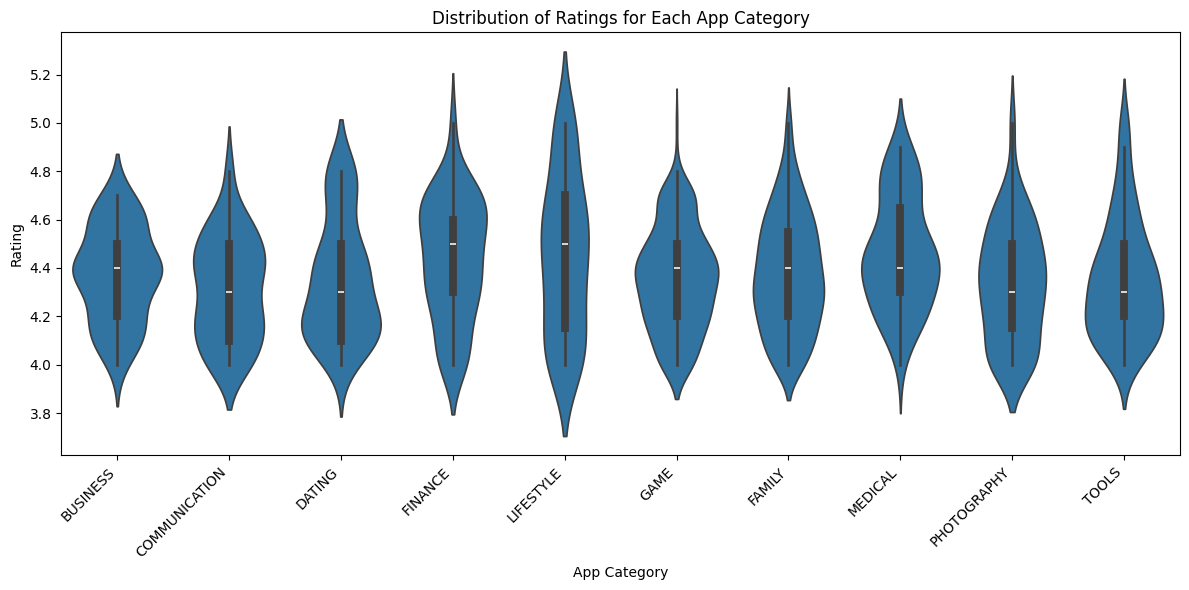

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pytz
from datetime import time
data=pd.read_csv('cleaned_playstore_data.csv')
filtered_data = data[
    (data["Reviews"] >= 10) & (data["Rating"] >= 4.0) & (data["App"].str.contains("C", na=False))
]

category_counts = filtered_data.groupby("Category")["App"].count()
valid_categories = category_counts[category_counts> 50].index
filtered_data = filtered_data[filtered_data["Category"].isin(valid_categories)]
plt.figure(figsize=(12, 6))
sns.violinplot(x="Category", y="Rating", data=filtered_data)
plt.title("Distribution of Ratings for Each App Category")
plt.xlabel("App Category")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout() #IST timezone(UTC(+5:30))
now = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).time()
if time(16, 0) <= now <= time(18, 0):
    plt.show()
else:
  print("The plot is only display between 4PM to 6PM IST")